In [1]:
# Import of required libraries
import os, numpy as np, matplotlib.pyplot as plt, pandas as pd
from PIL import Image
from scipy.ndimage import convolve

from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

from skimage.transform import resize
from skimage.io import imread_collection, imshow

Imported 300 images
0.0
0.0
(28, 28, 3)


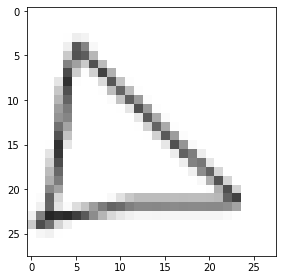

In [2]:
# Get collection of images
imgs = imread_collection('/Users/jkovach/Downloads/shapes/*/*.png')
check = 215    # this is a check function for a specific image

# Get number of images and check that each is the same size
print('Imported', len(imgs), 'images')
print(np.std([len(x) for x in imgs]))
print(np.std([len(x[0]) for x in imgs]))

# Get size of image and plot image
print(imgs[check].shape)
imshow(imgs[check])

In [3]:
# Flatten images to arrays
imgsarr = [x.flatten() for x in imgs]

# Create target variable, interior loop is number of images for each class, exterior is number of classes
Y = [[_ for i in range(1,101)] for _ in range(1,4)]
Y = [num for sub in Y for num in sub]

In [5]:
# Define RBM for feature generation
rbm = BernoulliRBM(random_state=0, verbose=True, learning_rate=.01, 
                   n_iter=20, n_components=150)

# Define logistic regression classifier
logistic = LogisticRegression(solver='newton-cg', max_iter=10000, 
                              C=6000, multi_class='multinomial')

# Create pipeline conbining RBM and classifier
rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# Train pipeline
rbm_features_classifier.fit(imgsarr, Y)

[BernoulliRBM] Iteration 1, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 4, pseudo-likelihood = 0.00, time = 0.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 6, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 7, pseudo-likelihood = 0.00, time = 0.11s
[BernoulliRBM] Iteration 8, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 9, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 10, pseudo-likelihood = 0.00, time = 0.11s
[BernoulliRBM] Iteration 11, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 12, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 13, pseudo-likelihood = 0.00, time = 0.11s
[BernoulliRBM] Iteration 14, pseudo-likelihood = 0.00, time = 0.10s
[BernoulliRBM] Iteration 15, pseudo-likelihood = 0.00, ti

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.01,
                              n_components=150, n_iter=20, random_state=0,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=6000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [6]:
# Predict training data
Y_pred = rbm_features_classifier.predict(imgsarr)
print("Logistic regression using RBM Features:\n%s\n" % (
    metrics.classification_report(Y, Y_pred)))

Logistic regression using RBM Features:
              precision    recall  f1-score   support

           1       0.33      1.00      0.50       100
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00       100

    accuracy                           0.33       300
   macro avg       0.11      0.33      0.17       300
weighted avg       0.11      0.33      0.17       300




/Users/jkovach/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

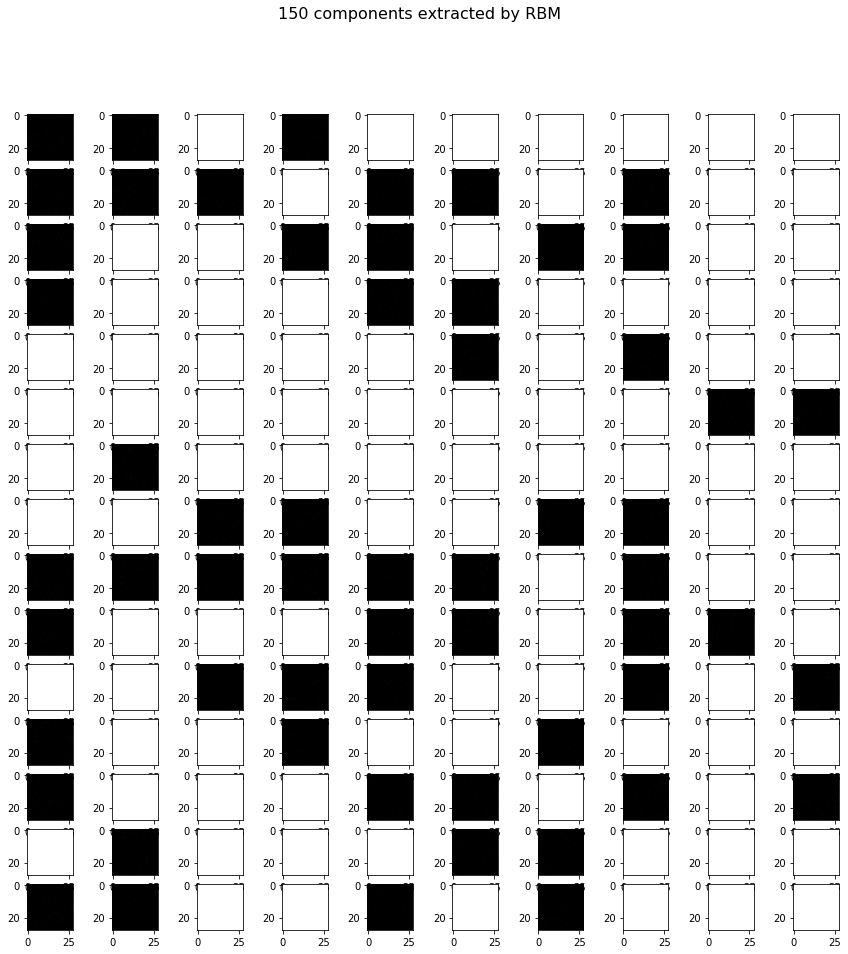

In [7]:
# Visualizing features

plt.figure(figsize=(15, 15))
for i, comp in enumerate(rbm.components_[:150]):
    plt.subplot(15,10,i+1)
    plt.imshow(comp.reshape((28,28,3)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks()
    plt.yticks()

plt.suptitle('150 components extracted by RBM', fontsize=16)
plt.show()
    